# LISTA DE EXERCÍCIOS - SEMANA 2

## Exercício 1

Os motores de um avião operam independentemente e cada um deles pode falhar durante o voo com probabilidade $p$. Suponha que o voo decorre com inteira segurança se pelo menos a metade dos motores funcionam. Nestas condições, é possível que um bimotor seja mais seguro do que um quadrimotor? Para quais valores de $p$ isto acontece?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Solução

A probabilidade de o bimotor cair, Pb, é a probabilidade de os 2 motores falharem, ou seja $p^2$.

A probabilidade de o quadrimotor cair, Pq, é a probabilidade de 3 ou 4 motores falharem. Essa probabilidade é $\binom{4}{3} p^3(1-p) + \binom{4}{4} p^4$.

Queremos saber para quais valores de p temos Pb < Pq.

$p^2 < \binom{4}{3} p^3(1-p) + \binom{4}{4} p^4$

$p^2 < 4 p^3(1-p) + p^4$

$3p^4 -4p^3 + p^2 < 0$

$3p^2 -4p + 1 < 0$ (podemos ignorar as soluções em que $p = 0$)

Resolvendo essa inequação, temos que Pb < Pq quando $1/3 < p < 1$.


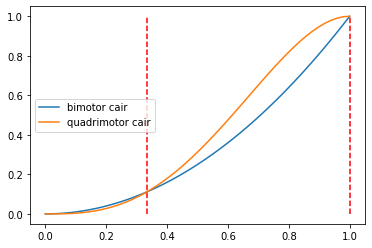

In [2]:
# probabilidades p
p = np.linspace(0, 1, 50)

# probabilidades de cair
bimotor = p ** 2 # prob. de os dois motores falharem
quadrimotor = (4 * p ** 3 * (1 - p)) + (1 * p ** 4) # prob. de 3 ou 4 motores falharem

plt.plot(p, bimotor, label = 'bimotor cair')
plt.plot(p, quadrimotor, label = 'quadrimotor cair')

plt.plot([1/3, 1/3], [0, 1], 'r--')
plt.plot([1, 1], [0, 1], 'r--')

plt.legend()
plt.show()

## Exercício 2

Um quiosque vende milho cozido, água de coco e açaí numa praia do litoral norte de São Paulo. A dona do quiosque quer planejar melhor a preparação de milho cozido durante o verão. Ela pode deixar preparadas $5$, $6$ ou $7$ dúzias de espigas, que custam a ela $R\$ 5,00$ a dúzia. Sabe-se que a procura por espigas de milho cozidas ($X$), no seu ponto, é uma variável aleatória com a seguinte função de probabilidade:

x | f(x)
-- | ----
4 | 0,2
5 | 0,3
6 | 0,3
7 | 0,2

Cada dúzia é vendida a $R\$ 12,00$ e aquelas espigas que não são vendidas vão para uma empresa que produz adubo orgânico que paga $R\$ 2,00$ pela dúzia. Qual é o número de dúzias de espigas que devem ser preparadas de modo a maximizar o lucro médio da vendedora?



In [21]:
Px = [.2, .3, .3, .2]
X  = [4, 5, 6, 7]
for prep in [5, 6, 7]:
    lucro_medio = 0
    for p, x in zip(Px, X):
        vendeu = min(x, prep)
        sobrou = max(prep - x, 0)
        lucro = vendeu * 12 + sobrou * 2 - prep * 5
        lucro_medio += p * lucro
    print(prep, lucro_medio)

5 33.0
6 35.0
7 34.0


## Exercício 3

A variável aleatória contínua $T$ é usada para modelar o número de dias, $t$, que um mosquito sobrevive depois de eclodir.

A probabilidade de que o mosquito sobreviva por mais de $t$ dias é $$\frac{225}{(t+15)^2}, \quad t \geq 0.$$


**Questão 3a)**
Mostre que a função de distribuição acumulada de $T$ é dada por 
$$F(t) = \begin{cases} 1- \frac{225}{(t+15)^2}, & t \geq 0, \\ 0, & \mbox{caso contrário.} \end{cases}$$

Solução:

Dado que $F(t) = P(T \le t)$

Note que já sabemos que $P(T > t) = 225 / (t + 15)^2$

E como $P(T \le t) = 1 - P(T > t)$

Então $F(t) = 1 - 225 / (t + 15)^2$

**Questão 3b)**
Encontre a probabilidade de que um mosquito selecionado aleatoriamente morrer dentro de 3 dias após eclodir.

In [4]:
# A probibilidade de morrer nos 3 primeiros dias é a mesma probabilidade de morrer em qualquer momento nos três primeiros dias.
# E morrer em um dia t é o mesmo que sobreviver até um dia t. Logo queremos saber P(T <= 3) = F(3)
F = lambda t : 1 - 225 / (t + 15) ** 2
F(3)

0.3055555555555556

**Questão 3c)**
Dado que um mosquito sobrevive por $3$ dias, encontre a probabilidade de que ele sobreviva por pelo menos outros $5$ dias adicionais.

Solução

$P(T \ge 8 | T \ge 3) =$

$P(T \ge 8, T \ge 3) / P(T \ge 3) =$

$P(T \ge 8) / P(T \ge 3)$

Além disso, sabemos que $P(T \ge t) = 1 - F(t)$

In [5]:
(1 - F(8)) / (1 - F(3)) 

0.612476370510397

**Questão 3d)**
Considere que um grande número de mosquitos eclodiu no mesmo dia.

Encontre o número de dias após o qual espera-se que apenas $10\%$ desses mosquitos sobrevivam.

Solução

Existe um dia t a partir do qual é esperado que apenas 10% dos mosquitos sobrevivam. Como todos eclodiram num mesmo dia, é esperado que para cada mosquito individualmente a probabilidade de sobreviver pelo menos até o dia t seja 10%. Ou seja:

$P(T \ge t) = 10\%$

$225 / (t + 15)^2 = 0.1$

$2250 = (t + 15)^2$

$t = \pm \sqrt{2250} - 15$ 


In [6]:
from math import sqrt

t = sqrt(2250) - 15 # ignorando -sqrt pois daria um número negativo de dias
t

32.43416490252569

**Questão 3e)**
Em Python, faça o gráfico de F(t) e f(t)

Solução

Já sabemos F(t), mas ainda precisamos calcular f(t).

$f(t) = F'(t)$

$f(t) = \frac d {dt} (1 - \frac {225} {(t + 15)^2})$

$f(t) = \frac {450} {(t + 15)^3}$


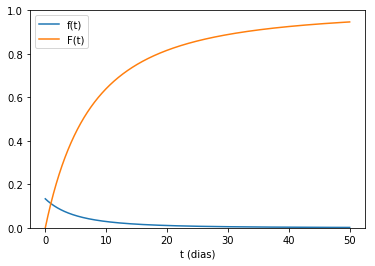

In [10]:
f = lambda t : 450 / (t + 15) ** 3

t = np.linspace(0, 50, 10000)

plt.plot(t, f(t), label = 'f(t)')
plt.plot(t, F(t), label = 'F(t)')   # repare que F(t) tende a 1, quando t tende a infinito
plt.xlabel('t (dias)')
plt.ylim(0,1)

plt.legend()
plt.show()

## Exercício 4

Suponha que $X_1$ e $X_2$ são variáveis aleatórias independentes com média $0$ e variância $\sigma^2$.

$(i)$ Qual é a covariância de $U = X_1 +2X_2$ e $V = 4X_1-3X_2$? 

$(ii)$ Qual é a correlação entre essas variáveis?

$(iii)$ Utilize a fórmula abaixo para calcular a correlação de uma simulação com 10^6 amostras aleatórias de U e V cada. Compare com o resultado obtido em $(ii)$

$Corr = \frac {Cov(U, V)} {\sqrt{Var(U)Var(v)}}$



Solução (i):

Para calcular Cov(U, V), vamos usar algumas propriedades importantes.
- 1) $Cov(A, A) = Var(A)$
- 2) $Cov(A, B) = 0$, se A e B independentes
- 3) $Cov(aA, bB) = abCov(A, B)$
- 4) $Cov(A + B, C) = Cov(A, C) + Cov(B, C)$

Essas propriedades podem ser verificadas com as propriedades de esperança vistas na videoaula.

Dessa maneira:

$Cov(U, V) = Cov(X_1 + 2X_2, 4X_1 - 3X_2) = $

$Cov(X_1, 4X_1 - 3X_2) + Cov(2X_2, 4X_1 - 3X_2) = $

$Cov(X_1, 4X_1) + Cov(X_1,- 3X_2) + Cov(2X_2, 4X_1) + Cov(2X_2, -3X_2) = $

$4Cov(X_1, X_1) - 3Cov(X_1,X_2) + 8Cov(X_2, X_1) - 6Cov(X_2, X_2) = $

$4(Var(X_1)) - 3(0) + 8(0) - 6(Var(X_2)) =$

$4\sigma^2 -6\sigma^2 = -2\sigma^2$ 

Solução (ii):

Precisamos calcular Var(U) e Var(V):

$Var(U) = Var(X_1 + 2X_2) = Var(X_1) + 4Var(X_2) = 5\sigma^2$

$Var(V) = Var(4X_1 - 3X_2) = 16Var(X_1) + 9Var(X_2) = 25\sigma^2$

Logo:

$Corr = \frac {Cov(U, V)} {\sqrt{Var(U)Var(v)}} = \frac {-2\sigma^2} {\sqrt{5\sigma^2 25\sigma^2}} = \frac {-2} {5\sqrt{5}}$

In [20]:
import numpy as np
from math import sqrt

X1 = np.random.normal(0, 1, 10**6)
X2 = np.random.normal(0, 1, 10**6)

U = X1 + 2 * X2
V = 4 * X1 - 3 * X2

Cov = (U * V).mean() # note que não é preciso tirar a média pois sabemos que é 0
VarU = U.var()
VarV = V.var()

Corr = Cov/sqrt(VarU*VarV)

print('Simulação', Corr)
print('Método analítico', -2 / (5 * sqrt(5)))

Simulação -0.1795893521789425
Método analítico -0.17888543819998318
